In [61]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of the data will be used for validation
)

# Define the data directory
data_dir = r'C:\Users\andre\Downloads\archive\lung_colon_image_set\lung_image_sets'

# Create data generators
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Adjust based on model input size
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

valid_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Adjust based on model input size
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load the pre-trained CNN model
cnn_model = load_model('cnn_model.keras')

# Unfreeze some layers in the CNN model
for layer in cnn_model.layers:
    layer.trainable = True

# Recompile the model with a lower learning rate
cnn_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the CNN model on the new dataset
cnn_history = cnn_model.fit(
    train_gen, 
    epochs=5, 
    validation_data=valid_gen
)

# Save the fine-tuned model
cnn_model.save('cnn_model_finetuned.keras')


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.
Epoch 1/5


C:\Users\andre\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 1027s 3s/step - accuracy: 0.7392 - loss: 1.6549 - val_accuracy: 0.9273 - val_loss: 0.2506
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1065s 3s/step - accuracy: 0.9556 - loss: 0.1417 - val_accuracy: 0.9803 - val_loss: 0.0594
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1070s 3s/step - accuracy: 0.9618 - loss: 0.1278 - val_accuracy: 0.9737 - val_loss: 0.0706
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1069s 3s/step - accuracy: 0.9718 - loss: 0.0931 - val_accuracy: 0.9787 - val_loss: 0.0543
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1071s 3s/step - accuracy: 0.9694 - loss: 0.1001 - val_accuracy: 0.9757 - val_loss: 0.0686


In [65]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained EfficientNetB3 model
efficientnetb3_model = load_model('efficientnetb3_model.keras')

# Unfreeze some layers in the EfficientNetB3 model
for layer in efficientnetb3_model.layers:
    layer.trainable = True

# Recompile the model with a lower learning rate
efficientnetb3_model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the EfficientNetB3 model on the new dataset
efficientnetb3_history = efficientnetb3_model.fit(
    train_gen, 
    epochs=3, 
    validation_data=valid_gen
)

# Save the fine-tuned model
efficientnetb3_model.save('efficientnetb3_model_finetuned.keras')


Epoch 1/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 3749s 10s/step - accuracy: 0.2342 - loss: 3.4021 - val_accuracy: 0.3127 - val_loss: 4043.4026
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 3559s 9s/step - accuracy: 0.8383 - loss: 0.4336 - val_accuracy: 0.8953 - val_loss: 0.2840
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 3586s 10s/step - accuracy: 0.8997 - loss: 0.2790 - val_accuracy: 0.9263 - val_loss: 0.2266


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


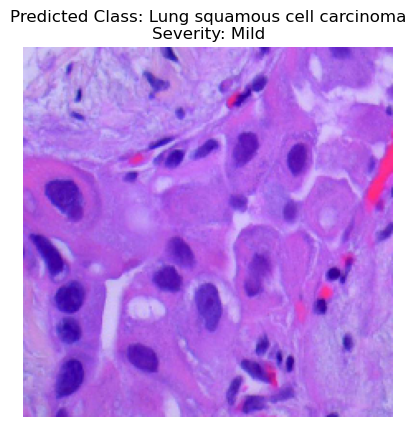

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the fine-tuned CNN model
cnn_model = tf.keras.models.load_model('cnn_model_finetuned.keras')

# Define the classes and severity mapping
classes = ['Lung adenocarcinoma', 'Lung benign tissue', 'Lung squamous cell carcinoma', 'Colon adenocarcinoma', 'Colon benign tissue']
severity_mapping = {
    'Lung adenocarcinoma': 'Severe',
    'Lung benign tissue': 'Normal',
    'Lung squamous cell carcinoma': 'Mild',
    'Colon adenocarcinoma': 'Severe',
    'Colon benign tissue': 'Normal'
}

def classify_image(model, img_path, img_size):
    # Load and preprocess the image
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to [0, 1]
    
    # Predict the class
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions[0])
    predicted_class = classes[class_index]
    
    return predicted_class, img

def get_severity(predicted_class):
    return severity_mapping[predicted_class]

# Path to the image for detection
img_path = r'C:\Users\andre\Downloads\archive\lung_colon_image_set\lung_image_sets\lung_aca\lungaca1.jpeg'  # Replace with the actual path to the image
img_size = (224, 224)  # Input size expected by your CNN model

# Perform classification and get the severity
predicted_class, img = classify_image(cnn_model, img_path, img_size)
severity = get_severity(predicted_class)

# Display the image along with the result
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}\nSeverity: {severity}")
plt.axis('off')  # Hide the axis
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


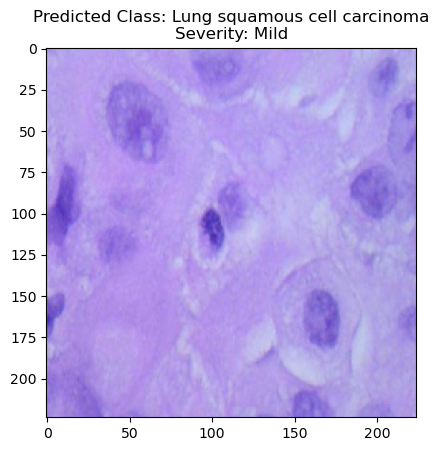

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the fine-tuned CNN and EfficientNetB3 models
cnn_model = tf.keras.models.load_model('cnn_model_finetuned.keras')
efficientnetb3_model = tf.keras.models.load_model('efficientnetb3_model_finetuned.keras')

# Define the classes and severity mapping
classes = ['Lung adenocarcinoma', 'Lung benign tissue', 'Lung squamous cell carcinoma', 'Colon adenocarcinoma', 'Colon benign tissue']
severity_mapping = {
    'Lung adenocarcinoma': 'Severe',
    'Lung benign tissue': 'Normal',
    'Lung squamous cell carcinoma': 'Mild',
    'Colon adenocarcinoma': 'Severe',
    'Colon benign tissue': 'Normal'
}

def classify_image(models, img_path, img_size):
    # Load and preprocess the image
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to [0, 1]
    
    # Get predictions from both models
    predictions_cnn = models['cnn'].predict(img_array)
    predictions_efficientnetb3 = models['efficientnetb3'].predict(img_array)
    
    # Combine predictions (average)
    combined_predictions = (predictions_cnn + predictions_efficientnetb3) / 2
    class_index = np.argmax(combined_predictions[0])
    predicted_class = classes[class_index]
    
    return predicted_class, img

def get_severity(predicted_class):
    return severity_mapping[predicted_class]

# Load the models into a dictionary
models = {
    'cnn': cnn_model,
    'efficientnetb3': efficientnetb3_model
}

# Path to the image for detection
img_path = r"C:\Users\andre\Downloads\archive\lung_colon_image_set\lung_image_sets\lung_scc\lungscc2978.jpeg"  # Replace with the actual path to the image
img_size = (224, 224)  # Input size expected by your models

# Perform classification and get the severity
predicted_class, img = classify_image(models, img_path, img_size)
severity = get_severity(predicted_class)

# Display the image along with the result
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}\nSeverity: {severity}")
plt.axis('on')  # Hide the axis
plt.show()
